# Histogram Equalization and Specification

## 1.Please prepare four images: (a) dark; (b) bright; (c)low contrast; (d) high contrast,like the following images.

### (a) Describe how you generate yourfour images. Show the images together with the corresponding histograms.

I used python with opencv library to create four different images from a base image.

How I adjusted the image brightness is by adding a integer value called beta to each pixels. The value of alpha should be within -100 ~ 100 or the image after adjusted will be too bright or too dark. 

How I adjusted the image contrast is by multiplying a float value called alpha to each pixels. If alpha value is within (0 ~ 1.0) then the output image will have lower contrast compared to original image. If alpha value is bigger than 1.0 then the output image will have higher contrast compared to original image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot  as plt

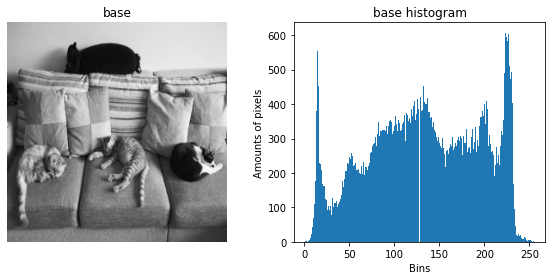

In [2]:
# read and show the target image in grayscale
base = cv2.imread('four_cats.jpg', 0)

plt.figure(num='base', figsize=(8,4))

plt.subplot(1, 2, 1)
plt.title('base')
plt.imshow(base, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(base.flatten(), bins=256)
plt.title('base histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# avoid histogram ylabel overlap with the neighbor plot
plt.tight_layout()

plt.show()

In [3]:
# declare four different images objects copiing from base image
dark = base.copy()
bright = base.copy()
low_con = base.copy()
high_con = base.copy()

# when alpha is within (0, 1.0) it makes output image has lower contrast
# when it is bigger than 1.0 it makes output image has higer contrast
alpha = 1.0

# bigger value of beta will make output image brighter
# smaller value (negative) of beta will make output image darker
beta = 0

# loop every pixel and operate with alpha, beta
for y in range(base.shape[0]):
    for x in range(base.shape[1]):
        # dark image process
        alpha = 1.0
        beta = -25
        dark[y,x] = np.clip(alpha * base[y,x] + beta, 0, 255)

        # bright image process
        alpha = 1.0
        beta = 25
        bright[y,x] = np.clip(alpha * base[y,x] + beta, 0, 255)

        # low contrast image process
        alpha = 0.2
        beta = 0
        low_con[y,x] = np.clip(alpha * base[y,x] + beta, 0, 255)

        # high contract image process
        alpha = 1.11
        beta = 0
        high_con[y,x] = np.clip(alpha * base[y,x] + beta, 0, 255)

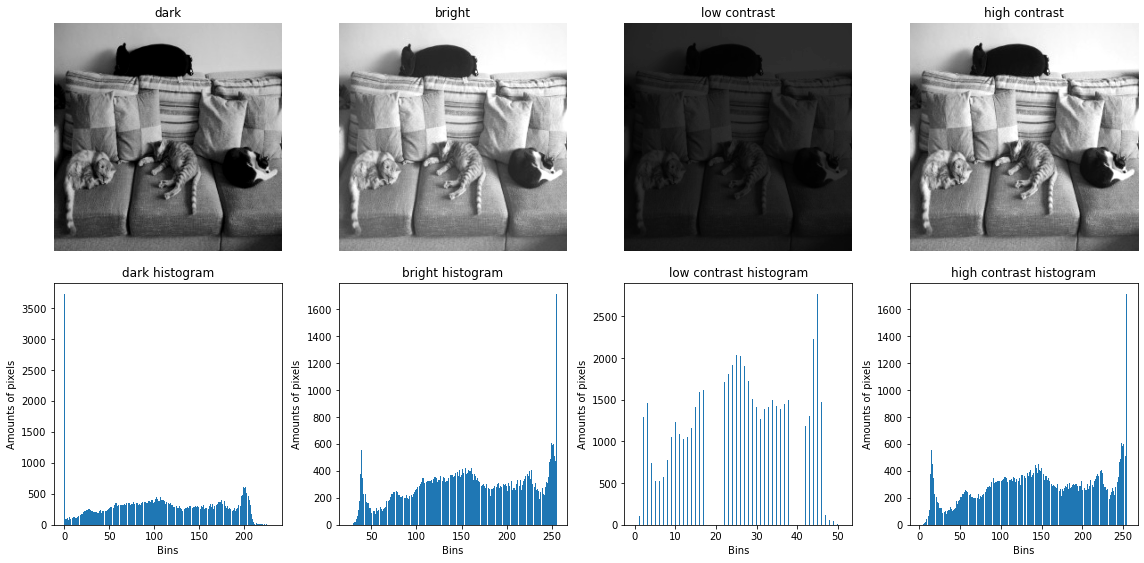

In [4]:
# apply side-by-side image display
plt.figure(num='four_cats', figsize=(16,8))

# dark image subplot
plt.subplot(2, 4, 1)
plt.title('dark')
plt.imshow(dark, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# bright image subplot
plt.subplot(2, 4, 2)
plt.title('bright')
plt.imshow(bright, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# low contrast image subplot
plt.subplot(2, 4, 3)
plt.title('low contrast')
plt.imshow(low_con, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# high contrast image subplot
plt.subplot(2, 4, 4)
plt.title('high contrast')
plt.imshow(high_con, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# dark image histogram
plt.subplot(2, 4, 5)
plt.hist(dark.flatten(), bins=256)
plt.title('dark histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# bright image histogram
plt.subplot(2, 4, 6)
plt.hist(bright.flatten(), bins=256)
plt.title('bright histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# low contrast image histogram
plt.subplot(2, 4, 7)
plt.hist(low_con.flatten(), bins=256)
plt.title('low contrast histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# high contrast image histogram
plt.subplot(2, 4, 8)
plt.hist(high_con.flatten(), bins=256)
plt.title('high contrast histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# avoid histogram ylabel overlap with the neighbor plot
plt.tight_layout()

plt.show()

### (b) Find the transfer curves to enhance these images, show the results and histograms as well. Please take into account of the methods of contrast stretching and equalization and be sure to give the comparison and discussion.

#### (b) - 1 Contrast Stretching
##### Min-Max Stretching

In Min-Max Stretching, the lower and upper values of the input image are made to span the full dynamic range. In other words, Lower value of the input image is mapped to 0 and the upper value is mapped to 255. All other intermediate values are reassigned new intensity values according to the following formulae

![formulae](math.png)




In [5]:
# make a copy for each images
minmax_dark = dark.copy()
minmax_bright = bright.copy()
minmax_low_con = low_con.copy()
minmax_high_con = high_con.copy()

# get the minimum and maximum pixel value for each images
min_dark, max_dark = np.min(dark), np.max(dark)
min_bright, max_bright = np.min(bright), np.max(bright)
min_low_con, max_low_con = np.min(low_con), np.max(low_con)
min_high_con, max_high_con = np.min(high_con), np.max(high_con)

# Loop over the images and apply Min-Max formulae
for i in range(base.shape[0]):
    for j in range(base.shape[1]):
        minmax_dark[i,j] = 255 * (dark[i,j] - min_dark) / (max_dark - min_dark)
        minmax_bright[i,j] = 255 * (bright[i,j] - min_bright) / (max_bright - min_bright)
        minmax_low_con[i,j] = 255 * (low_con[i,j] - min_low_con) / (max_low_con - min_low_con)
        minmax_high_con[i,j] = 255 * (high_con[i,j] - min_high_con) / (max_high_con - min_high_con)

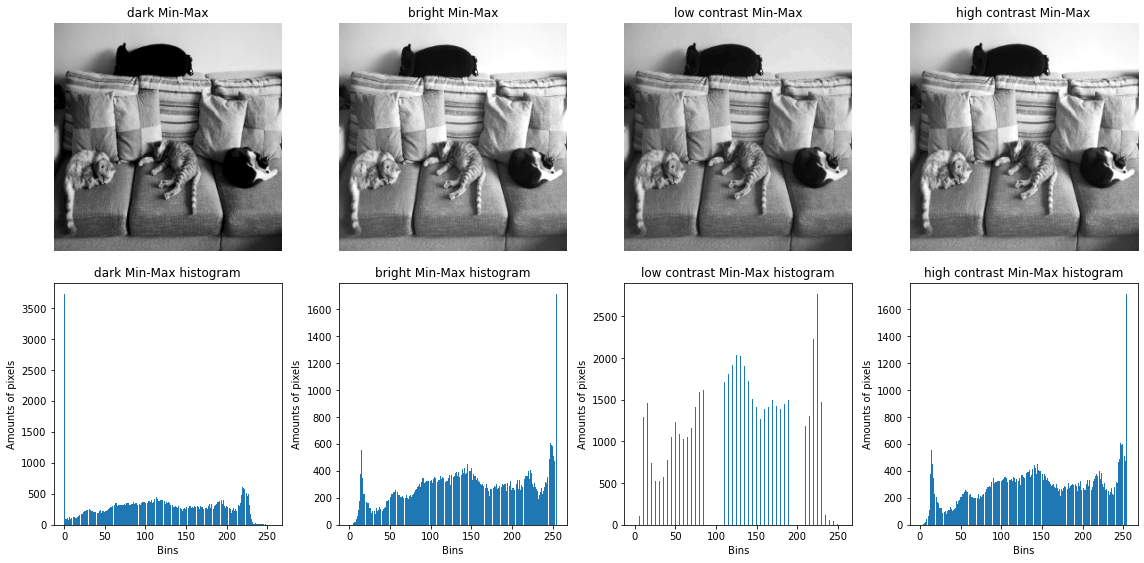

In [6]:
# apply side-by-side image display
plt.figure(num='four_cats_MinMax', figsize=(16,8))

# dark image subplot
plt.subplot(2, 4, 1)
plt.title('dark Min-Max')
plt.imshow(minmax_dark, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# bright image subplot
plt.subplot(2, 4, 2)
plt.title('bright Min-Max')
plt.imshow(minmax_bright, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# low contrast image subplot
plt.subplot(2, 4, 3)
plt.title('low contrast Min-Max')
plt.imshow(minmax_low_con, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# high contrast image subplot
plt.subplot(2, 4, 4)
plt.title('high contrast Min-Max')
plt.imshow(minmax_high_con, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# dark image histogram
plt.subplot(2, 4, 5)
plt.hist(minmax_dark.flatten(), bins=256)
plt.title('dark Min-Max histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# bright image histogram
plt.subplot(2, 4, 6)
plt.hist(minmax_bright.flatten(), bins=256)
plt.title('bright Min-Max histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# low contrast image histogram
plt.subplot(2, 4, 7)
plt.hist(minmax_low_con.flatten(), bins=256)
plt.title('low contrast Min-Max histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# high contrast image histogram
plt.subplot(2, 4, 8)
plt.hist(minmax_high_con.flatten(), bins=256)
plt.title('high contrast Min-Max histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# avoid histogram ylabel overlap with the neighbor plot
plt.tight_layout()

plt.show()

#### (b) - 2 Histogram Equilization

Histogram Equalization is a method that improves the contrast in an image, in order to stretch out the intensity range.
What Histogram Equalization does is to stretch out this range.

In [7]:
# declare some function we will use later for histogram normalization

def cumulative_sum(pixel_num):
    # get cumulative sum of each pixel value from input image
    pixel_num = iter(pixel_num)
    next_pixel = [next(pixel_num)]
    for i in pixel_num:
        next_pixel.append(next_pixel[-1] + i)
    return np.array(next_pixel)


def get_pixel_num(image, bins):
    # calculating how many specfy value of pixel the input image has
    num = np.zeros(bins)
    for pixel in image:
        num[pixel] += 1
    return num

def histogram_equilization(target_img):
    # flatten the image to 1-dimention np.array
    target_flat = target_img.flatten()

    target_num = get_pixel_num(target_flat, 256)

    # get the accumulated pixel values sum
    target_CS = cumulative_sum(target_num)

    # get the numerator & denomenator from the formula
    numerator = (target_CS - target_CS.min()) * 255
    N = target_CS.max() - target_CS.min()

    # re-normalize the cdf
    target_CS = numerator / N

    # get the value from cumulative sum for every index in flat, and set that as img_new
    target_new = target_CS[target_flat]

    # reshape the new image back to 2-dimention nparray
    target_new = np.reshape(target_new, target_img.shape)

    return target_new

In [8]:
# apply histogram equilization for each images
HE_dark = histogram_equilization(dark)
HE_bright = histogram_equilization(bright)
HE_low_con = histogram_equilization(low_con)
HE_high_con = histogram_equilization(high_con)

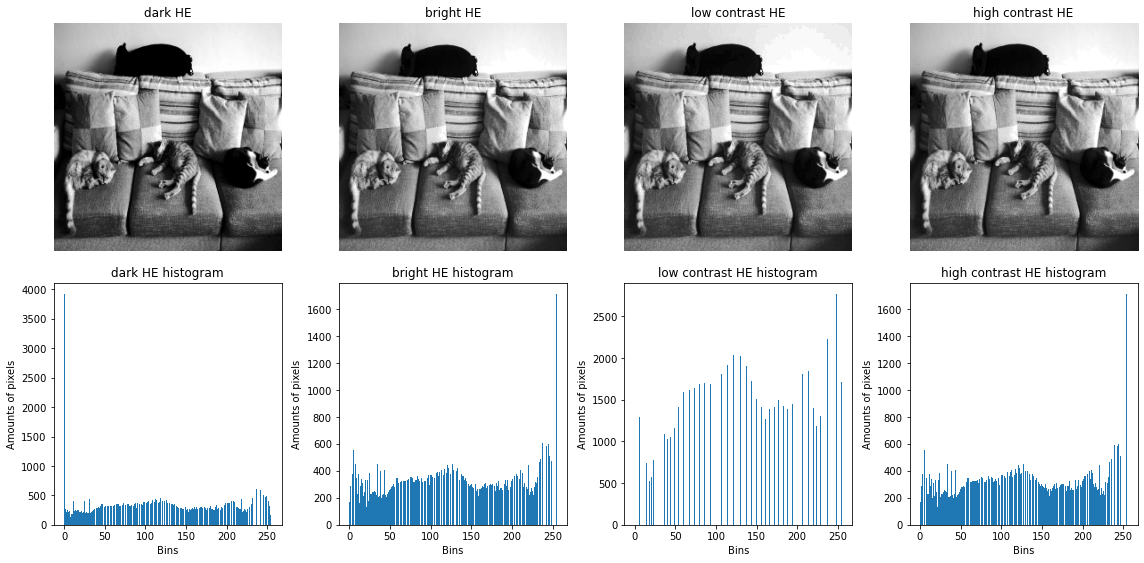

In [9]:
# apply side-by-side image display
plt.figure(num='four_cats_HE', figsize=(16,8))

# dark image subplot
plt.subplot(2, 4, 1)
plt.title('dark HE')
plt.imshow(HE_dark, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# bright image subplot
plt.subplot(2, 4, 2)
plt.title('bright HE')
plt.imshow(HE_bright, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# low contrast image subplot
plt.subplot(2, 4, 3)
plt.title('low contrast HE')
plt.imshow(HE_low_con, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# high contrast image subplot
plt.subplot(2, 4, 4)
plt.title('high contrast HE')
plt.imshow(HE_high_con, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# dark image histogram
plt.subplot(2, 4, 5)
plt.hist(HE_dark.flatten(), bins=256)
plt.title('dark HE histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# bright image histogram
plt.subplot(2, 4, 6)
plt.hist(HE_bright.flatten(), bins=256)
plt.title('bright HE histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# low contrast image histogram
plt.subplot(2, 4, 7)
plt.hist(HE_low_con.flatten(), bins=256)
plt.title('low contrast HE histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# high contrast image histogram
plt.subplot(2, 4, 8)
plt.hist(HE_high_con.flatten(), bins=256)
plt.title('high contrast HE histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# avoid histogram ylabel overlap with the neighbor plot
plt.tight_layout()

plt.show()

### Disccusion

For dark and bright images, HE and Min-Max stretching both methods work well. I prefer Min-Max for bright case because there is a small artifact in the bright HE image above part. If the example images can have smoother histogram (no extreme high peak at 0 and 255 pixel value), than HE can works on it even better.

For low and high contrast images, my opinion is HE works a little bit better than Min-Max. We can see  from the histogram that pixel value has smoother and better disperse in the range 0 ~ 255. (for example the original low contrast image most pixel values are within the range 0 ~ 50.) Images output from HE also have slightly better contrast and detail compared to Min-Max stretching.

Disadvantage of HE method could be the ineffcient time cost from cdf calculating however Min-Max is a linear transfer function and only need simple value multiplication and addition.

## 2. Select one noon picture from the internet. Most area of the noon is nearly dark because there is only dim light there. Enhance the selected image by using equalization and specification ,compare the results and give a discussion.

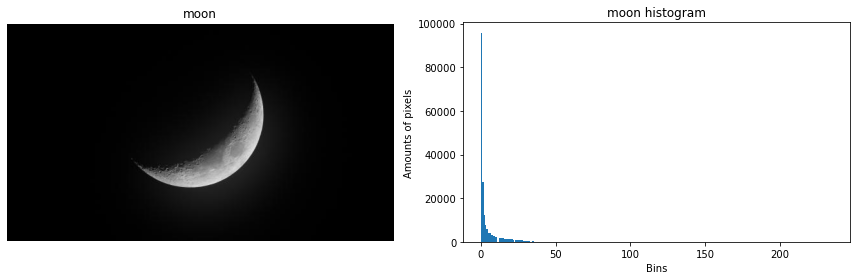

In [12]:
# read and show the target image in grayscale
moon = cv2.imread('waxing-crescent-moon.jpg', 0)

plt.figure(num='moon', figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title('moon')
plt.imshow(moon, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(moon.flatten(), bins=256)
plt.title('moon histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# avoid histogram ylabel overlap with the neighbor plot
plt.tight_layout()

plt.show()

In [25]:
# Let's try to enhance this image by addjusting alpha and beta first

# make a copy for each images
moon_bright = moon.copy()
moon_low_con = moon.copy()
moon_high_con = moon.copy()

# Loop over the images
for i in range(moon.shape[0]):
    for j in range(moon.shape[1]):
        # bright image process
        alpha = 1.0
        beta = 500
        moon_bright[y,x] = np.clip(alpha * moon[y,x] + beta, 0, 255)

        # low contrast image process
        alpha = 0.3
        beta = 0
        moon_low_con[y,x] = np.clip(alpha * moon[y,x] + beta, 0, 255)

        # high contract image process
        alpha = 10.0
        beta = 0
        moon_high_con[y,x] = np.clip(alpha * moon[y,x] + beta, 0, 255)

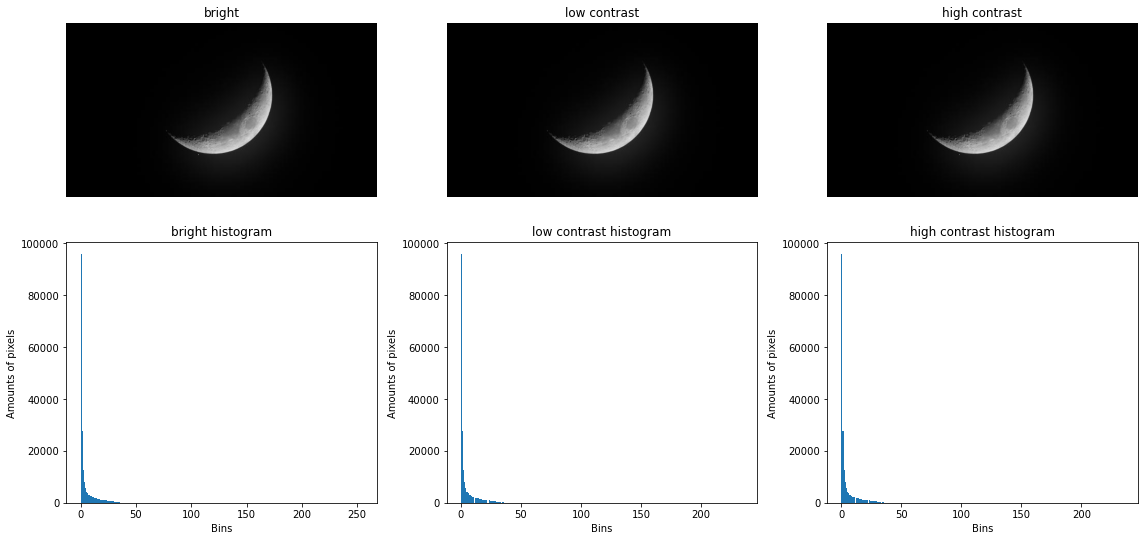

In [26]:
# apply side-by-side image display
plt.figure(num='moons', figsize=(16,8))

# bright image subplot
plt.subplot(2, 3, 1)
plt.title('bright')
plt.imshow(moon_bright, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# low contrast image subplot
plt.subplot(2, 3, 2)
plt.title('low contrast')
plt.imshow(moon_low_con, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# high contrast image subplot
plt.subplot(2, 3, 3)
plt.title('high contrast')
plt.imshow(moon_high_con, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# bright image histogram
plt.subplot(2, 3, 4)
plt.hist(moon_bright.flatten(), bins=256)
plt.title('bright histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# low contrast image histogram
plt.subplot(2, 3, 5)
plt.hist(moon_low_con.flatten(), bins=256)
plt.title('low contrast histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# high contrast image histogram
plt.subplot(2, 3, 6)
plt.hist(moon_high_con.flatten(), bins=256)
plt.title('high contrast histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# avoid histogram ylabel overlap with the neighbor plot
plt.tight_layout()

plt.show()

In [21]:
# then apply Min-Max stretching
minmax_moon = moon.copy()

# get the minimum and maximum pixel value
min_moon, max_moon = np.min(moon), np.max(moon)

# Loop over the images and apply Min-Max formulae
for i in range(moon.shape[0]):
    for j in range(moon.shape[1]):
        minmax_moon[i,j] = 255 * (minmax_moon[i,j] - min_moon) / (max_moon - min_moon)

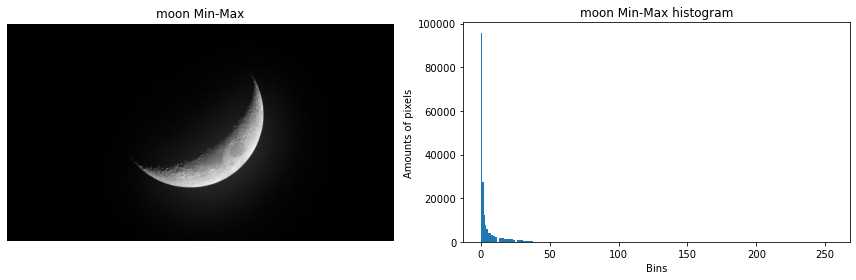

In [22]:
plt.figure(num='moon Min-Max', figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title('moon Min-Max')
plt.imshow(minmax_moon, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(minmax_moon.flatten(), bins=256)
plt.title('moon Min-Max histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# avoid histogram ylabel overlap with the neighbor plot
plt.tight_layout()

plt.show()

In [23]:
# and try histogram equalization
HE_moon = histogram_equilization(moon)

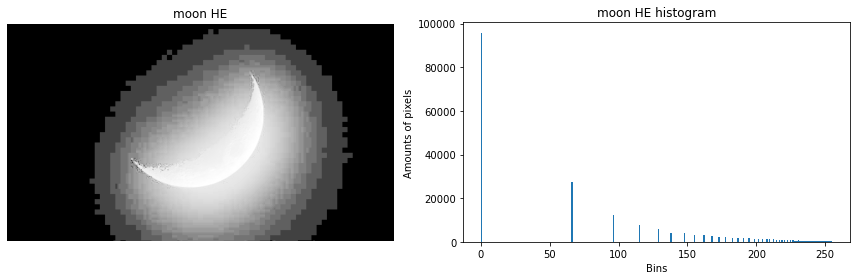

In [24]:
plt.figure(num='moon HE', figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title('moon HE')
plt.imshow(HE_moon, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(HE_moon.flatten(), bins=256)
plt.title('moon HE histogram')
plt.xlabel('Bins')
plt.ylabel('Amounts of pixels')

# avoid histogram ylabel overlap with the neighbor plot
plt.tight_layout()

plt.show()

### Disccusion

Let's cut into the conclusion first: no any method works listed above.

The base image of the cresent moon is just too dark. No enough information to let each of these image enhancing methods work. As the histogram shows, almost 100,000 pixels have value 0. (image size is 600 x 337 = 202,200 means near half of the image is pure dark.)

Addjusting alpha and beta value seems no differents from the original. Min-Max does the same.
Histogram equilization basically breaks the whole image due to extremely unbalance histogram (50% area has 0 pixel value and no pixel value is above 50).

There is a image adjusted by me manualy used image editor:

![moon_edited](waxing-crescent-moon_new.jpg)

No sufficient improvement.

Image enhancing method has limitation when there is no enough information in the image. If the image just too dark or too bright then traditional image enhancing method cannot do a good trick on it. These methods cannot create the pixel value if it is not exist from the begining.